<a href="https://colab.research.google.com/github/KevKil/IPWK4/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_11_Kevin_Kilonzo_Hypothesis_Testing_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project Week Four

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

## Project question

Investigating the claim about the selection of blue cars and whether there is a difference in selection between the weekdays and the weekends

## Implimentation

### a) Specifying the question

To show how the variable of blue cars taken is affected by the day selection type and whether there is a difference by day type

### b) Defining the metric for success

To be able to come up with evidence either for rejecting or failing to reject the null hypothesis

### c) Understanding the context

we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

### d) Recording the experimental design

The following are steps I will follow in order to complete this project:

1. Importing all the necessary libraries
2. Loading the data set
3. Read and clean the data set
4. Exploratory Data Analysis
5. Simple Random Sampling
6. Hypothesis Testing





### e) Data relevance

* **Postal** -code	postal code of the area (in Paris)
* **date**	-date of the row aggregation
* **n_daily_data_points**	-number of daily data poinst that were available for aggregation, that day
* **dayOfWeek**	-identifier of weekday (0: Monday -> 6: Sunday)
* **day_type**	-weekday or weekend
* **BlueCars_taken_sum**	-Number of bluecars taken that date in that area
* **BlueCars_returned_sum**	-Number of bluecars returned that date in that area
* **Utilib_taken_sum**	-Number of Utilib taken that date in that area
* **Utilib_returned_sum**	-Number of Utilib returned that date in that area
* **Utilib_14_taken_sum**	-Number of Utilib 1.4 taken that date in that area
* **Utilib_14_returned_sum**	-Number of Utilib 1.4 returned that date in that area
* **Slots_freed_sum**	-Number of recharging slots released that date in that area
* **Slots_taken_sum**	-Number of rechargign slots taken that date in that area

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

## Reading the data

In [4]:
# Loading the autolib dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

In [5]:
# Loading autolib column names dataset
names = pd.read_excel('/content/columns_explanation.xlsx')

### Data exploration

In [6]:
# Preview of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
# Checking number of rows and columns
df.shape

(16085, 13)

In [8]:
# Checking descriptions of the column names
pd.set_option('display.max_colwidth', -1)
names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,"number of daily data poinst that were available for aggregation, that day"
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that area
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## Data wrangling

In [9]:
# Checking the statistical summary of the dataset
# ---
#

df.describe()

# count, mean, standard deviation, minimum value, interquartile ranges, maximum values observed 

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [10]:
# Checking for null values

df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
# Checking duplicate values
# ---
#

df.duplicated().sum()

0

In [12]:
# Checking columns and their data types
# ---
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


### Data manipulation

In [13]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [14]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


In [15]:
# We remove spaces in the column names and convert them to lower case
# --
#

df.columns = df.columns.str.replace(" ", "_").str.lower()

In [16]:
# Renaming the columns to appropriate names
# --
#

df.rename(columns={'dayofweek':'day_of_week','bluecars_taken_sum':'bluecars_taken_total',
                         'bluecars_returned_sum':'bluecars_returned_total'},inplace = True)

In [17]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_total', 'bluecars_returned_total', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

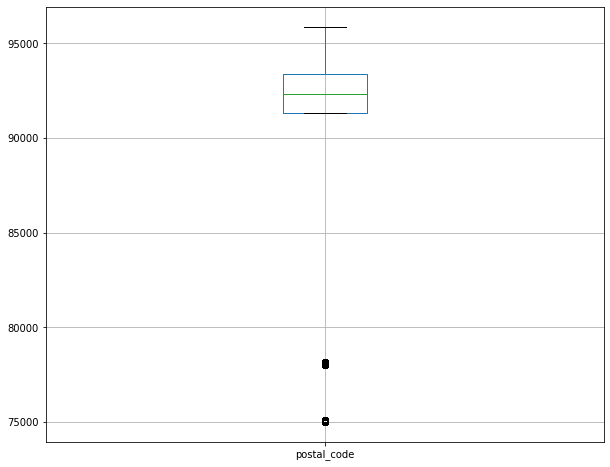

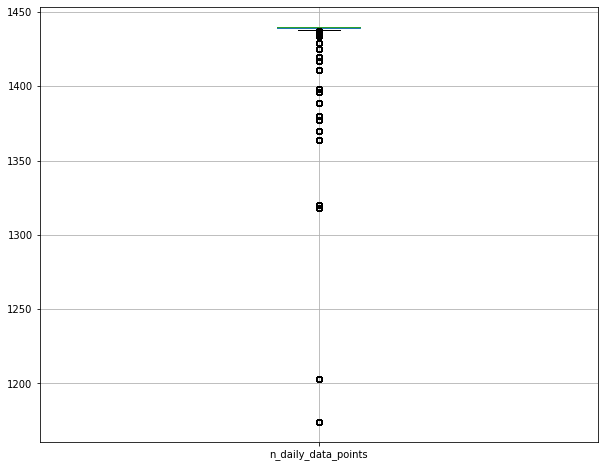

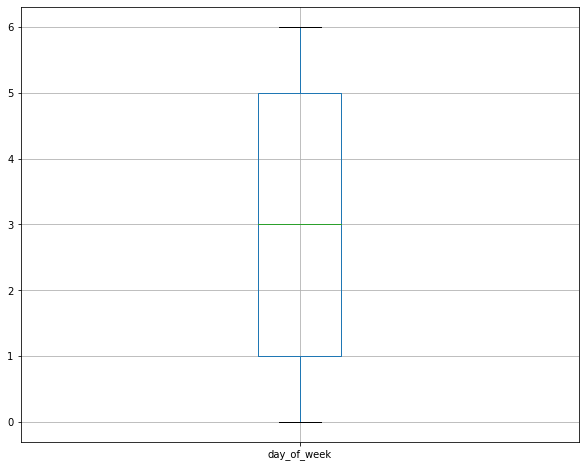

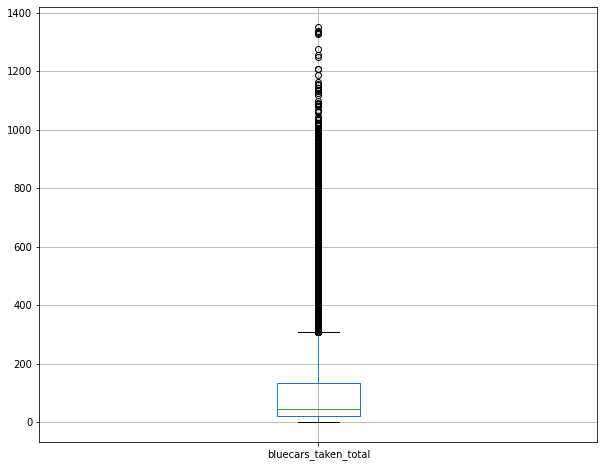

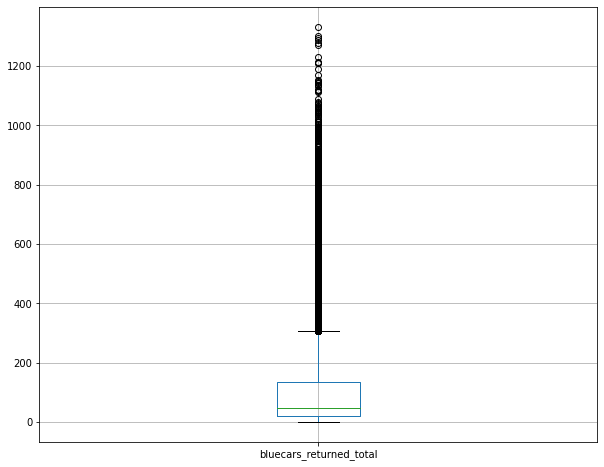

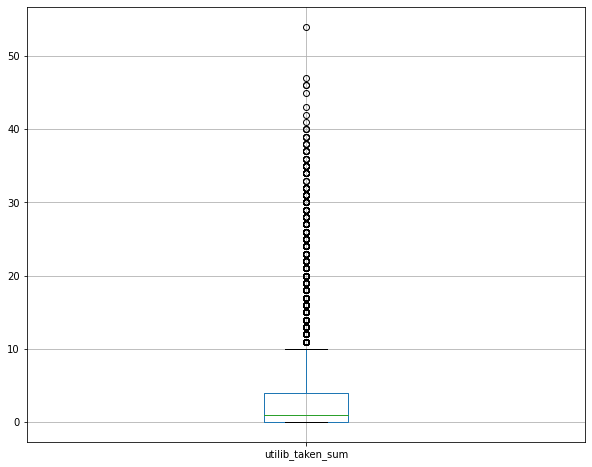

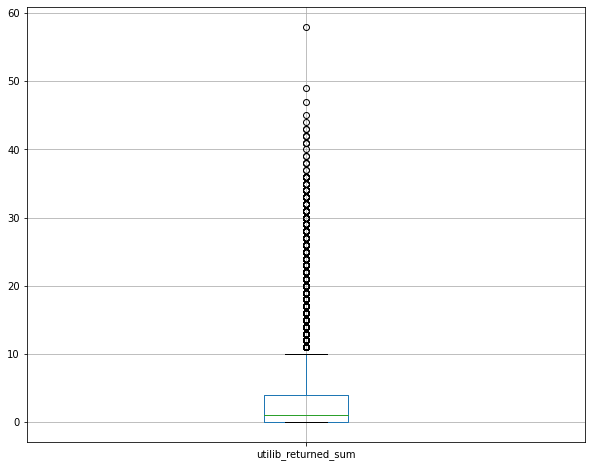

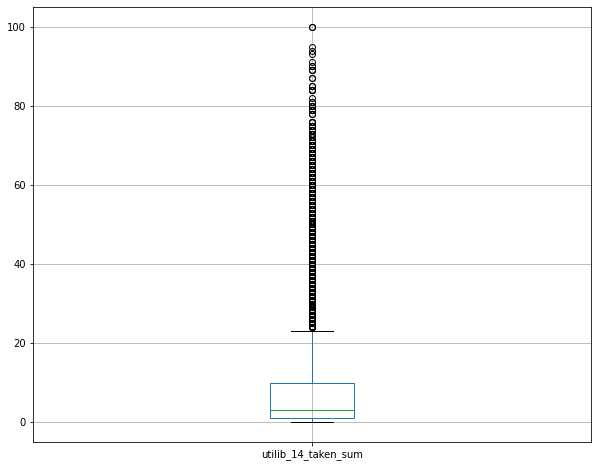

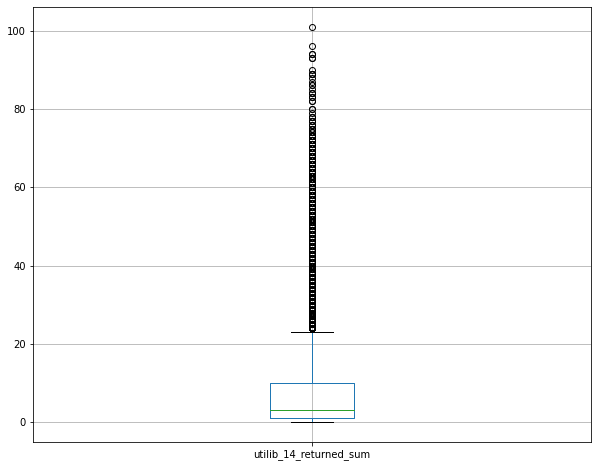

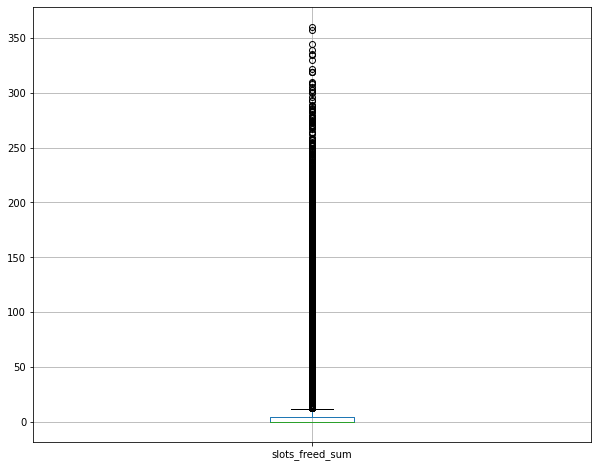

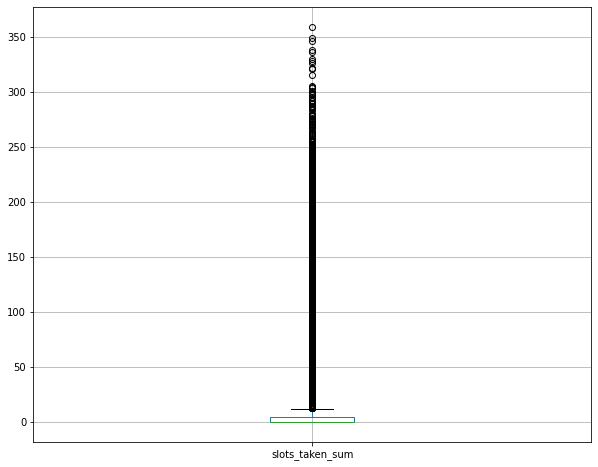

In [18]:
# Using boxplots to check for outliers
# --
#

num_cols = df.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df.boxplot([col])

Most of the numerical columns have outliers but the outliers will be kept as they are vital for analysis

In [19]:
# Checking the unique values in the columns
for i in df.columns:
  print(df[i].unique())

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000000' '2018-01-10T00:00:00.000000000'
 '2018-01-11T00:00:00.000000000' '2018-01

In [20]:
# Selecting columns necessary for analysis
df_final = df[['date','postal_code','n_daily_data_points','day_of_week','day_type','bluecars_taken_total','bluecars_returned_total']]

In [21]:
df_final.head()

,date,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_total,bluecars_returned_total
0,2018-01-01,75001,1440,0,weekday,110,103
1,2018-01-02,75001,1438,1,weekday,98,94
2,2018-01-03,75001,1439,2,weekday,138,139
3,2018-01-04,75001,1320,3,weekday,104,104
4,2018-01-05,75001,1440,4,weekday,114,117


## Exploratory analysis

### Univariate analysis

In [22]:
# Count,mean,standard deviation,min val,interquartile range and max val of the numerical columns
num_cols = df_final.select_dtypes('number').columns
df_final[num_cols].describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_total,bluecars_returned_total
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


In [23]:
# Median of the numerical columns
df_final[num_cols].median()

postal_code                92340.0
n_daily_data_points        1440.0 
day_of_week                3.0    
bluecars_taken_total       46.0   
bluecars_returned_total    46.0   
dtype: float64

In [24]:
# Mode of numerical columns
df_final[num_cols].mode()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_total,bluecars_returned_total
0,75001,1440.0,0.0,12.0,13.0
1,75002,NaN,NaN,NaN,NaN
2,75003,NaN,NaN,NaN,NaN
3,75004,NaN,NaN,NaN,NaN
4,75005,NaN,NaN,NaN,NaN
...,...,...,...,...,...
84,94700,NaN,NaN,NaN,NaN
85,94800,NaN,NaN,NaN,NaN
86,95100,NaN,NaN,NaN,NaN
87,95870,NaN,NaN,NaN,NaN






1.   The most common number of daily data points is 1440
2.   The most common day of the week is 0 (Monday)
3.   89 postal codes appear the most often number of times



In [25]:
# Checking postal codes which appear the least number of times
df_final.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390    84 
Name: postal_code, Length: 104, dtype: int64

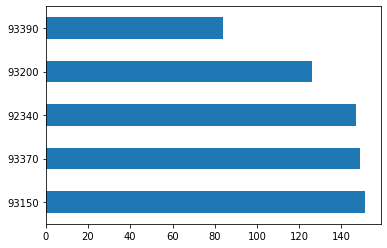

In [26]:
# Plotting frequency values of the bottom five post offices
df_final.postal_code.value_counts().tail(5).plot(kind ='barh')

Most of the postal code areas appeared 156 times in the dataset
The postal codes that appeared the least are 93390,93200 and 92340

In [27]:
# Grouping days of the week by count
df_final.day_of_week.value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: day_of_week, dtype: int64

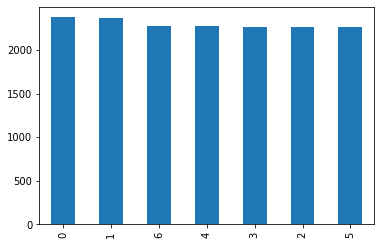

In [28]:
# Plotting frequency of days of the week
df_final.day_of_week.value_counts().plot(kind='bar')

Most frequent day of the week was Monday 
Least frequent day of the week was Saturday

In [29]:
# Grouping daily data points by count
df_final.n_daily_data_points.value_counts()

1440    10113
1439    2579 
1438    723  
1437    411  
1425    207  
1434    207  
1417    206  
1411    104  
1398    104  
1174    104  
1429    104  
1436    104  
1435    104  
1203    103  
1380    103  
1364    103  
1420    103  
1389    103  
1318    103  
1320    103  
1377    102  
1396    98   
1370    94   
Name: n_daily_data_points, dtype: int64

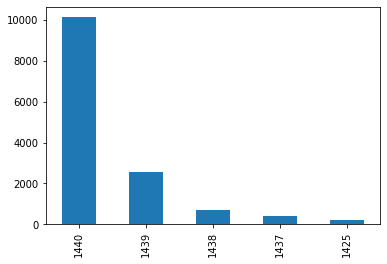

In [30]:
# Plotting frequency of top 5 daily data points
df_final.n_daily_data_points.value_counts().head(5).plot(kind='bar')

Most frequent number of daily data points was 1440. Least frwquent number of daily data points was 1370

In [31]:
# Grouping day type by count
df_final.day_type.value_counts()

weekday    11544
weekend    4541 
Name: day_type, dtype: int64

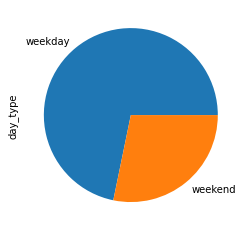

In [32]:
df_final.day_type.value_counts().plot(kind='pie')

The frequency of weekdays was higher than weekends

In [33]:
# Grouping dates by frequency
df_final.date.value_counts()

2018-06-12    104
2018-05-06    104
2018-01-24    104
2018-05-05    104
2018-06-01    104
             ... 
2018-04-18    102
2018-02-15    102
2018-03-14    101
2018-02-24    98 
2018-06-19    94 
Name: date, Length: 156, dtype: int64

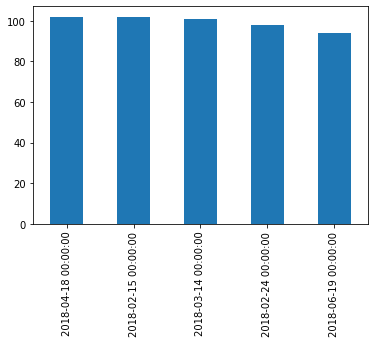

In [34]:
df_final.date.value_counts().tail(5).plot(kind='bar')

Dates with lowest frequency are 2018=06=19 and 2018-02-24

In [35]:
# Getting the skewness of the numerical variables
df_final[num_cols].skew()

postal_code               -1.168778
n_daily_data_points       -5.742776
day_of_week                0.018824
bluecars_taken_total       2.406355
bluecars_returned_total    2.412085
dtype: float64



1.   Postal code and daily data points are negatively skewed that is the tail on the left of the distribution is longer than the right
2.   Blue cars taken and blue cars returned are positively skewed i.e tail on the right is longer than the left
3.   Day of the week is normally distributed



In [36]:
# Getting the kurtosis of the numerical data
df_final[num_cols].kurt()

postal_code               -0.542143 
n_daily_data_points        36.594846
day_of_week               -1.260994 
bluecars_taken_total       6.172692 
bluecars_returned_total    6.186288 
dtype: float64



1.   Blue cars taken,blue cars returned and daily data points are leptokurtic i.e distribution is heavier on the tails
2.   Postal code has relatively normal kuetosis
3.   Days of the week is slightly platykurtic i.e distribution has light tails



### Bivariate analysis

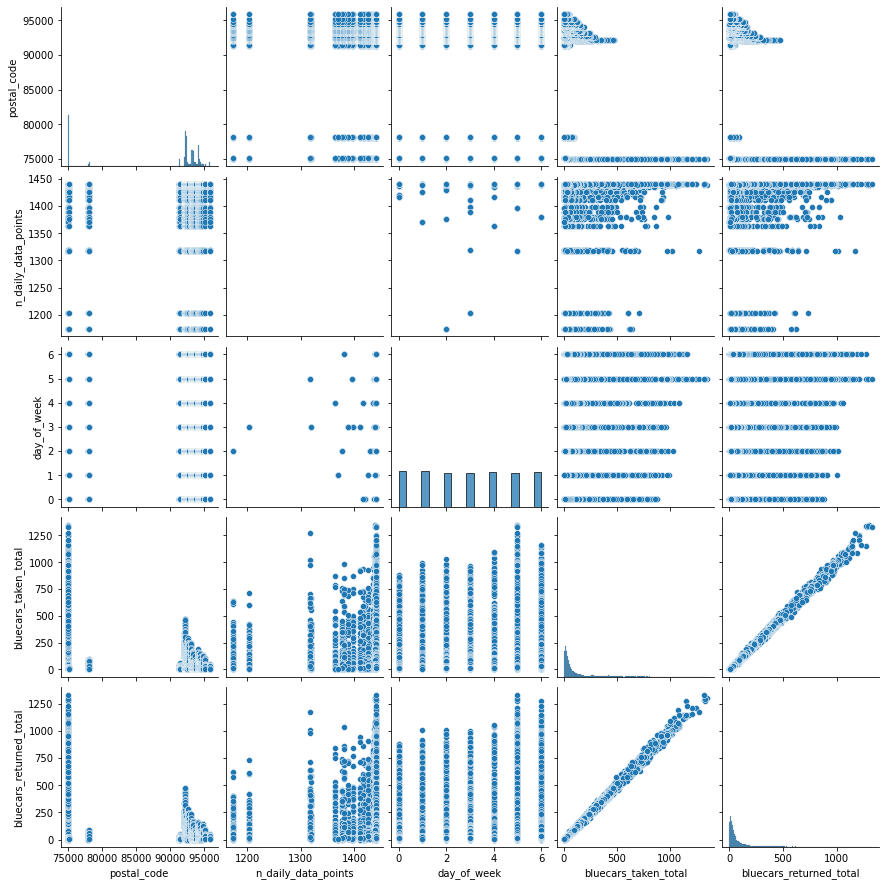

In [37]:
# Scatter plot of tne numeric variables
sns.pairplot(df_final)

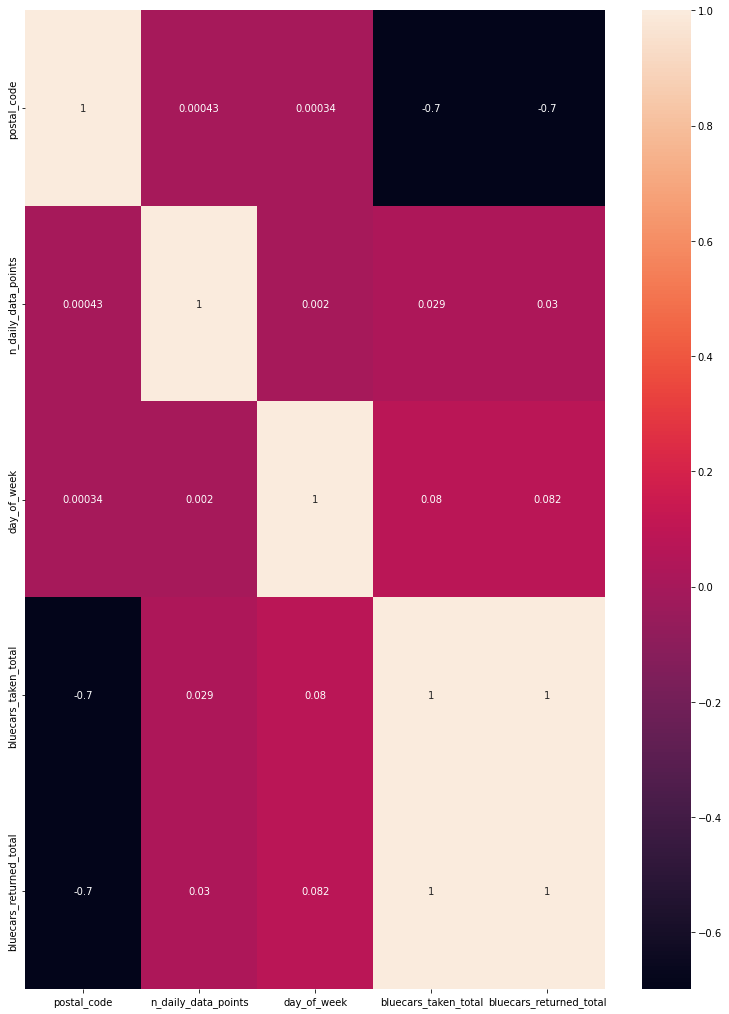

In [38]:
# Correlation heat map of the numeric variables
f, ax = plt.subplots(figsize=(13,18))
corr = df_final.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True)

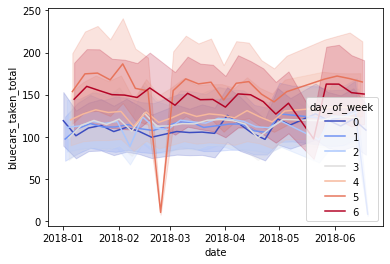

In [39]:
# Line graph of blue cars taken and dates
sns.lineplot(data=df, x="date", y="bluecars_taken_total", hue='day_of_week',palette="coolwarm")
plt.show()

2018-02-24 and 2018-06-19 are the days with lowest blue cars taken

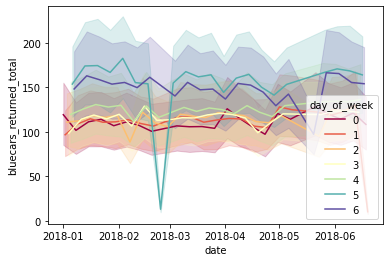

In [40]:
# Line graph of blue cars returned and dates
sns.lineplot(data=df, x="date", y="bluecars_returned_total", hue='day_of_week',markers=True, palette="Spectral")




2018-02-24 and 2018-06-19 are the days with lowest blue cars returned

Text(0.5, 0, 'Days of the Week')

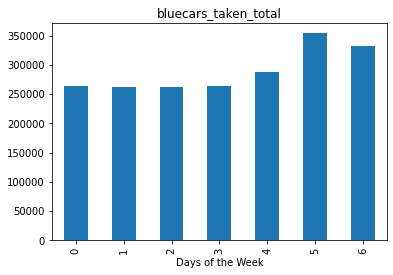

In [41]:
# Graph of blue cars taken compared to day type
df_final.groupby('day_of_week')['bluecars_taken_total'].sum().plot(kind='bar')
plt.title('bluecars_taken_total')
plt.xlabel('Days of the Week')

Saturday is the highest day for cars taken

Text(0.5, 0, 'Days of the Week')

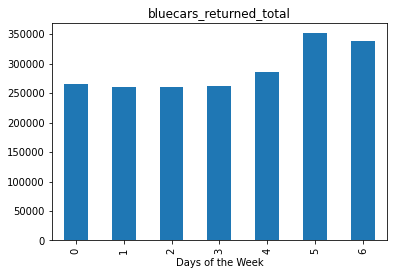

In [42]:
# Graph of blue cars returned compared to day type
df_final.groupby('day_of_week')['bluecars_returned_total'].sum().plot(kind='bar')
plt.title('bluecars_returned_total')
plt.xlabel('Days of the Week')

Saturday is the highest day for cars returned

Text(0.5, 0, 'Days type')

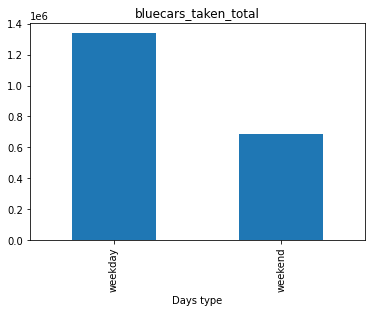

In [43]:
# Graph of blue cars taken and retuned compared to day of the week
df_final.groupby('day_type')['bluecars_taken_total'].sum().plot(kind='bar')
plt.title('bluecars_taken_total')
plt.xlabel('Days type')

Text(0.5, 0, 'Days type')

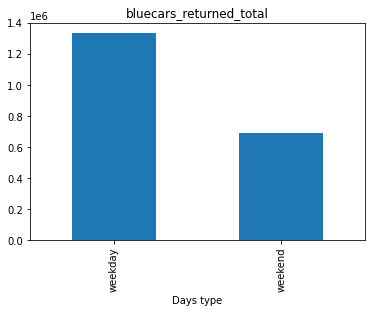

In [44]:
df_final.groupby('day_type')['bluecars_returned_total'].sum().plot(kind='bar')
plt.title('bluecars_returned_total')
plt.xlabel('Days type')

Most of the cars are taken and retuned on weekdays

### Tests for normality

In [45]:
#formal test on normality
bt = stats.shapiro(df_final.bluecars_taken_total)
print(bt)

(0.661232590675354, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
br = stats.shapiro(df_final.bluecars_returned_total)
print(br)

(0.6598013639450073, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


There is no significant p value and that is to mean that the data is normally distributed

## Sampling

We use the stratified sampling method to ensure the proportions of day types is maintained

In [47]:
# Selecting columns required for hypothesis testing
df_hypo = df[['day_type','bluecars_taken_total']]
df_hypo

,day_type,bluecars_taken_total
0,weekday,110
1,weekday,98
2,weekday,138
3,weekday,104
4,weekday,114
...,...,...
16080,weekday,15
16081,weekend,19
16082,weekend,33
16083,weekday,11


In [48]:
df_hypo.shape

(16085, 2)

In [49]:
# Getting a sample from the dataset
sample= df_hypo.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))


By selecting 10 percent we can assume sample is independent.
Sample is representative of strata by daytype

## Hypothesis testing

We use a non parametric test as we are looking at the overall distribution of blue cars taken and comparing it to an expected value based on the null hypothesis
* Ho: There is no difference in blue cars taken for weekdays and weekends
* H1: There are more blue cars taken on weekends than weekdays
* significance level = 0.05

In [55]:
# Number of days by daytype
sample.day_type.value_counts()

weekday    1154
weekend    454 
Name: day_type, dtype: int64

In [62]:
# Sum of the daytype
samp_size = sample.day_type.count()
samp_size

1608

In [56]:
# Percentage of number of days by daytype
sample.day_type.value_counts()/sample.shape[0]

weekday    0.717662
weekend    0.282338
Name: day_type, dtype: float64

In [58]:
# Number of blue cars by daytype
sample.groupby('day_type')['bluecars_taken_total'].sum()

day_type
weekday    137757
weekend    68328 
Name: bluecars_taken_total, dtype: int64

In [59]:
# Total number of blue cars
sample.bluecars_taken_total.sum()

206085

In [60]:
from statsmodels.stats.proportion import proportions_ztest

# can we assume anything from our sample
significance = 0.05

# our sample 
blue_cars_weekend = 68328
blue_cars_total = 206085

# our Ho is  28.2338%
null_hypo = prop_blue_car_weekend = prop_weekend_count = 0.282338

# check our sample against Ho for Ha > Ho
# for Ha < Ho use alternative='smaller'
# for Ha != Ho use alternative='two-sided'
stat, p_value = proportions_ztest(count=blue_cars_weekend, nobs=blue_cars_total, value=null_hypo, alternative='larger')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > significance:
   print ("Fail to reject the null hypothesis - not enough evidence")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 47.458, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


As the p value is so small this shows enough evidence to reject the null hypothesis and say there are more blue cars taken in the weekends compared to the weekdays

In [68]:
# Calculating the standard error of the sample
std_err = np.sqrt((null_hypo*(1-null_hypo))/samp_size)
std_err

0.011225394699816423

In [70]:
# Calculating confidence interval of the sample at 95% confidence level
# Daytype_weekend = 454
upper = 454 + 1.96*std_err
lower = 454 + 1.96*std_err
print(upper , lower)

454.02200177361163 454.02200177361163


In [71]:
# Calculating the standard error of the bluecar sample
std_err = np.sqrt((null_hypo*(1-null_hypo))/blue_cars_weekend)
std_err

0.0017220481402646863

In [72]:
# Calculating confidence interval of the bluecar sample at 95% confidence level
# Daytype_weekend = 454
upper = 68328 + 1.96*std_err
lower = 68328 + 1.96*std_err
print(upper , lower)

68328.00337521435 68328.00337521435


As the sample size grows the confidence interval becomes smaller